# Compute final scores

In [1]:
%load_ext autoreload
%autoreload 2

In [25]:
import os
import json
import PIL.Image
import random
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision

from src.data.PascalVOC import dataset_voc, prepare_dataloaders_pascal_voc
from src.attacks.attacks import FastGradientSign, ProjectedGradientDescent, UniversalAttack
from src.training.Trainer import Trainer
from src.optim.scheduler import CustomScheduler

In [3]:
def seed_everything(seed_value=4995):
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything()

In [3]:
def load_model(num_classes = 20, model_path = None, to_cuda = True):
    if not model_path:
        model = torchvision.models.resnet18(pretrained = True)

#### get models

In [ ]:
pascal_net_vulnerable_path = 
pascal_net_pgd_robust_path = 
mnist_net_vulnerable_path = 
mnist_net_pgd_robust_path = 

In [ ]:
# define networks
pascal_net_vulnerable = fine tuned
pascal_net_pgd_robust = msls # copy load model from train pascal
mnist_net_vulnerable = simple_cnn
mnist_net_pgd_robust = simple_cnn_adv # copy load_model from heatmaps

### get heatmaps

In [4]:
# retrieve computed heatmaps

# folder = /heatmaps
# take function from compute heatmaps

# pascal: save pascal heatmap.py

heatmaps = {}
heatmaps["pascal_vulnerable_normal"] = {}
heatmaps["pascal_vulnerable_pgd"] = {}
heatmaps["pascal_vulnerable_up"] = {}
heatmaps["pascal_pgd_robust_normal"] = {}
heatmaps["pascal_pgd_robust_pgd"] = {}
heatmaps["pascal_pgd_robust_up"] = {}
#heatmaps["pascal_up_robust_normal"] = {}
#heatmaps["pascal_up_robust_pgd"] = {}
#heatmaps["pascal_up_robust_up"] = {}
heatmaps["mnist_vulnerable_normal"] = {}
heatmaps["mnist_vulnerable_pgd"] = {}
heatmaps["mnist_vulnerable_up"] = {}
heatmaps["mnist_pgd_robust_normal"] = {}
heatmaps["mnist_pgd_robust_pgd"] = {}
heatmaps["mnist_pgd_robust_up"] = {}
#heatmaps["mnist_up_robust_normal"] = 
#heatmaps["mnist_up_robust_pgd"] = 
#heatmaps["mnist_up_robust_up"] = 

## MNIST

In [53]:
heatmaps_mnist_vulnerable_normal_path = os.path.join(os.path.abspath(""),"heatmaps/mnist_normal_order_pred_true.npy")
heatmaps_mnist_vulnerable_pgd_perturbed_path =  os.path.join(os.path.abspath(""),"heatmaps/mnist_normal_network_perturbed_images_order_pred_true.npy")
heatmaps_mnist_pgd_robust_normal_path = os.path.join(os.path.abspath(""),"heatmaps/mnist_adv_trained_normal_images_order_pred_true.npy")
heatmaps_mnist_pgd_robust_pgd_perturbed_path = os.path.join(os.path.abspath(""),"heatmaps/mnist_adv_trained_perturbed_images_order_pred_true.npy")


In [54]:
with open(heatmaps_mnist_vulnerable_normal_path, 'rb') as f:
    heatmaps["mnist_vulnerable_normal"]["pred"] = torch.from_numpy(np.load(f))
    heatmaps["mnist_vulnerable_normal"]["gt"] = torch.from_numpy(np.load(f))
with open(heatmaps_mnist_vulnerable_pgd_perturbed_path, 'rb') as f:
    heatmaps["mnist_vulnerable_pgd"]["pred"] = torch.from_numpy(np.load(f))
    heatmaps["mnist_vulnerable_pgd"]["gt"] = torch.from_numpy(np.load(f))
with open(heatmaps_mnist_pgd_robust_normal_path, 'rb') as f:
    heatmaps["mnist_pgd_robust_normal"]["pred"] = torch.from_numpy(np.load(f))
    heatmaps["mnist_pgd_robust_normal"]["gt"] = torch.from_numpy(np.load(f))
with open(heatmaps_mnist_pgd_robust_pgd_perturbed_path, 'rb') as f:
    heatmaps["mnist_pgd_robust_pgd"]["pred"] = torch.from_numpy(np.load(f))
    heatmaps["mnist_pgd_robust_pgd"]["gt"] = torch.from_numpy(np.load(f))

In [62]:
for key, item in  heatmaps.items():
    for key_key, item_item in item.items():
        print(f"{key} {key_key} shape: {item_item.size()}")
#heatmaps["mnist_vulnerable_pgd"]["gt"].shape

mnist_vulnerable_normal pred shape: torch.Size([10000, 28, 28])
mnist_vulnerable_normal gt shape: torch.Size([10000, 28, 28])
mnist_vulnerable_pgd pred shape: torch.Size([10000, 28, 28])
mnist_vulnerable_pgd gt shape: torch.Size([10000, 28, 28])
mnist_pgd_robust_normal pred shape: torch.Size([79, 28, 28])
mnist_pgd_robust_normal gt shape: torch.Size([79, 28, 28])
mnist_pgd_robust_pgd pred shape: torch.Size([10000, 28, 28])
mnist_pgd_robust_pgd gt shape: torch.Size([10000, 28, 28])


In [52]:
torch.equal(heatmaps["mnist_vulnerable_normal"]["pred"],heatmaps["mnist_vulnerable_normal"]["gt"])
heatmaps["mnist_vulnerable_normal"]["pred"][heatmaps["mnist_vulnerable_normal"]["pred"]!=heatmaps["mnist_vulnerable_normal"]["gt"]]

tensor([1.9819e-05, 1.9819e-05, 1.9819e-05,  ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00], dtype=torch.float64)

### bboxes

In [8]:
from src.data.MNIST import get_mnist_bounding_box_data_loader

MNIST_path = os.path.join(os.path.abspath(""),"Data/")

dataloaders_bb_mnist = get_mnist_bounding_box_data_loader(MNIST_path)
val_loader = dataloaders_bb_mnist['val']
len(val_loader.dataset)

10000

In [9]:
mnist_val_bboxes = []
for batch in val_loader:
    #print(len(batch["bounding_box"]))
    #print(batch["bounding_box"][0][0])
    for i_img in range(len(batch["bounding_box"][0])):
        bbox = [int(batch["bounding_box"][0][i_img]),
            int(batch["bounding_box"][1][i_img]),
            int(batch["bounding_box"][2][i_img]),
            int(batch["bounding_box"][3][i_img])]
        #print(bbox)
        mnist_val_bboxes.append(bbox)
        #print(bbox)
print(len(mnist_val_bboxes))

In [16]:
from src.explainability.distances import _get_bounding_maps_vec_NEW
from src.explainability.distances import compute_weighted_iou_mult_class_vec_NEW, get_weighted_iou_mult_class_vec_NEW

(486, 500)
(486, 500)
0.11073191666890642
{'xmin': 104, 'ymin': 78, 'xmax': 375, 'ymax': 183}
{'xmin': 133, 'ymin': 88, 'xmax': 197, 'ymax': 123}
{'xmin': 195, 'ymin': 180, 'xmax': 213, 'ymax': 229}
{'xmin': 26, 'ymin': 189, 'xmax': 44, 'ymax': 238}
{'xmin': 174, 'ymin': 101, 'xmax': 349, 'ymax': 351}
{'xmin': 169, 'ymin': 104, 'xmax': 209, 'ymax': 146}
{'xmin': 278, 'ymin': 210, 'xmax': 297, 'ymax': 233}
{'xmin': 273, 'ymin': 333, 'xmax': 297, 'ymax': 354}
{'xmin': 319, 'ymin': 307, 'xmax': 340, 'ymax': 326}
torch.Size([2, 500, 500])
HEATMAPS tensor([[[[ 7.8937e-01,  6.2620e-01,  5.8325e-01,  ...,  5.8223e-01,
            9.7972e-01,  6.4838e-01],
          [ 7.7762e-02,  3.8415e-01,  4.9052e-01,  ...,  3.4391e-01,
            6.0434e-01,  1.0281e-02],
          [ 2.0897e-01,  4.6307e-01,  4.1580e-01,  ...,  3.3356e-01,
            1.1422e-01,  8.1094e-01],
          ...,
          [ 5.4756e-01,  1.7333e-01,  6.5064e-01,  ...,  5.5510e-01,
            9.7828e-01,  6.5412e-01],
       

In [12]:
mnist_val_bboxes[0]

[6, 7, 21, 26]

In [13]:
mnist_val_bounding_maps = _get_bounding_maps_vec_NEW((28,28),mnist_val_bboxes, 1, False)

In [14]:
print(mnist_val_bounding_maps.size())
print(heatmaps["mnist_pgd_robust_normal"]["gt"].size())

torch.Size([10000, 1, 28, 28])
torch.Size([10000, 28, 28])


torch.Size([28, 28])
[7, 3, 26, 22]
torch.Size([28, 28])
tensor(0.0042, dtype=torch.float64)


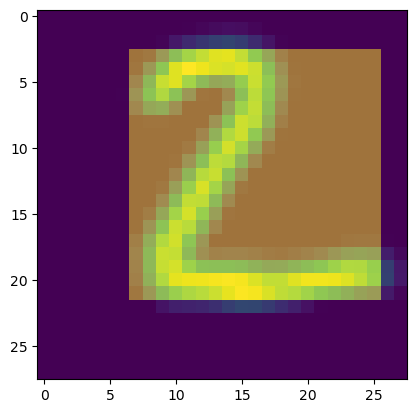

In [58]:
fig, ax = plt.subplots(1,1)
ax.imshow(heatmaps["mnist_pgd_robust_normal"]["gt"][1])
ax.imshow(mnist_val_bounding_maps[1][0],alpha=0.5)
print(heatmaps["mnist_pgd_robust_normal"]["gt"][1].size())
print(mnist_val_bboxes[1])
print(mnist_val_bounding_maps[1][0].size())
print(torch.max(heatmaps["mnist_pgd_robust_normal"]["gt"][1]))

In [64]:
#### CAUTION
wious = {}

In [67]:
wious["mnist_vulnerable_normal_gt"] = get_weighted_iou_mult_class_vec_NEW(
    heatmaps["mnist_vulnerable_normal"]["gt"], mnist_val_bounding_maps)
wious["mnist_vulnerable_normal_pred"] = get_weighted_iou_mult_class_vec_NEW(
    heatmaps["mnist_vulnerable_normal"]["pred"], mnist_val_bounding_maps)
wious["mnist_vulnerable_pgd_gt"] = get_weighted_iou_mult_class_vec_NEW(
    heatmaps["mnist_vulnerable_pgd"]["gt"], mnist_val_bounding_maps)
wious["mnist_vulnerable_pgd_pred"] = get_weighted_iou_mult_class_vec_NEW(
    heatmaps["mnist_vulnerable_pgd"]["pred"], mnist_val_bounding_maps)

#wious["mnist_pgd_robust_normal_gt"] = get_weighted_iou_mult_class_vec_NEW(
#    heatmaps["mnist_pgd_robust_normal"]["gt"], mnist_val_bounding_maps)
#wious["mnist_pgd_robust_normal_pred"] = get_weighted_iou_mult_class_vec_NEW(
#    heatmaps["mnist_pgd_robust_normal"]["pred"], mnist_val_bounding_maps)
wious["mnist_pgd_robust_pgd_gt"] = get_weighted_iou_mult_class_vec_NEW(
    heatmaps["mnist_pgd_robust_pgd"]["gt"], mnist_val_bounding_maps)
wious["mnist_pgd_robust_pgd_pred"] = get_weighted_iou_mult_class_vec_NEW(
    heatmaps["mnist_pgd_robust_pgd"]["pred"], mnist_val_bounding_maps)


intersections torch.Size([10000, 1, 28, 28])
unions torch.Size([10000, 1, 28, 28])
weighted_ious_per_bounding_map torch.Size([10000, 1, 1, 1, 1]) tensor([[[[[0.0000]]]],



        [[[[0.0001]]]],



        [[[[0.0003]]]],



        ...,



        [[[[0.0001]]]],



        [[[[0.0004]]]],



        [[[[0.0002]]]]], dtype=torch.float64)
weighted_ious_per_heatmap torch.Size([10000, 1, 1]) tensor([[[0.0000]],

        [[0.0001]],

        [[0.0003]],

        ...,

        [[0.0001]],

        [[0.0004]],

        [[0.0002]]], dtype=torch.float64)
weighted_ious_per_img torch.Size([10000]) tensor([0.0000, 0.0001, 0.0003,  ..., 0.0001, 0.0004, 0.0002],
       dtype=torch.float64)
intersections torch.Size([10000, 1, 28, 28])
unions torch.Size([10000, 1, 28, 28])
weighted_ious_per_bounding_map torch.Size([10000, 1, 1, 1, 1]) tensor([[[[[0.0000]]]],



        [[[[0.0001]]]],



        [[[[0.0003]]]],



        ...,



        [[[[0.0001]]]],



        [[[[0.0004]]]],



        [[[[0.

intersections torch.Size([10000, 1, 28, 28])
unions torch.Size([10000, 1, 28, 28])
weighted_ious_per_bounding_map torch.Size([10000, 1, 1, 1, 1]) tensor([[[[[0.0000]]]],



        [[[[0.0001]]]],



        [[[[0.0003]]]],



        ...,



        [[[[0.0001]]]],



        [[[[0.0004]]]],



        [[[[0.0002]]]]], dtype=torch.float64)
weighted_ious_per_heatmap torch.Size([10000, 1, 1]) tensor([[[0.0000]],

        [[0.0001]],

        [[0.0003]],

        ...,

        [[0.0001]],

        [[0.0004]],

        [[0.0002]]], dtype=torch.float64)
weighted_ious_per_img torch.Size([10000]) tensor([0.0000, 0.0001, 0.0003,  ..., 0.0001, 0.0004, 0.0002],
       dtype=torch.float64)


In [69]:
for key, val in wious.items():
    print(f"{key}:\t{torch.mean(val)} \t +/- {torch.std(val)}")

mnist_vulnerable_normal_gt:	0.0006307614931778128 	 +/- 0.0004389308133738842
mnist_vulnerable_normal_pred:	0.000630706080564945 	 +/- 0.0004409946779956424
mnist_vulnerable_pgd_gt:	0.000874571436031384 	 +/- 0.00046580636991986674
mnist_vulnerable_pgd_pred:	0.0007343281449787463 	 +/- 0.0004538406585077202
mnist_pgd_robust_pgd_gt:	0.0013121051552339618 	 +/- 0.0006681541825278486
mnist_pgd_robust_pgd_pred:	0.001357898938081362 	 +/- 0.0006574882837898054


## Pascal VOC

bounding boxes

In [70]:
from src.data.PascalVOC import prepare_dataloaders_pascal_voc

In [71]:
pascal_dir = os.path.join(os.path.abspath(""),"Data/VOC2012")
dataloaders, classes = prepare_dataloaders_pascal_voc(pascal_dir)

In [79]:
filenames = []
for batch in dataloaders["val"]:
    for i_img in range(len(batch["filename"])):
        filenames.append(batch["filename"][i_img].split(".")[0].split("/")[-1] + ".xml")
    #print(len(batch["filename"]))
    #break
print(len(filenames))
#print(filenames)

5823


In [81]:
pascal_dir = os.path.join(os.path.abspath(""),"Data/VOC2012")
pascal_bboxes_dir = os.path.join(os.path.abspath(""),"Data/VOC2012/Annotations")

In [94]:
from src.explainability.distances import get_bounding_boxes_vec, resize_bounding_boxes

(486, 500)
(486, 500)
0.11055516444086246
{'xmin': 104, 'ymin': 78, 'xmax': 375, 'ymax': 183}
{'xmin': 133, 'ymin': 88, 'xmax': 197, 'ymax': 123}
{'xmin': 195, 'ymin': 180, 'xmax': 213, 'ymax': 229}
{'xmin': 26, 'ymin': 189, 'xmax': 44, 'ymax': 238}
{'xmin': 174, 'ymin': 101, 'xmax': 349, 'ymax': 351}
{'xmin': 169, 'ymin': 104, 'xmax': 209, 'ymax': 146}
{'xmin': 278, 'ymin': 210, 'xmax': 297, 'ymax': 233}
{'xmin': 273, 'ymin': 333, 'xmax': 297, 'ymax': 354}
{'xmin': 319, 'ymin': 307, 'xmax': 340, 'ymax': 326}
torch.Size([2, 500, 500])
bounding_maps torch.Size([2, 4, 500, 500])
tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
      

In [95]:
pascal_val_bboxes, pascal_val_sizes = get_bounding_boxes_vec(filenames, pascal_bboxes_dir, return_dict=False)
pascal_val_bboxes = resize_bounding_boxes(pascal_val_bboxes, pascal_val_sizes)

size <class 'list'> [375, 500]
[[14, 148, 475, 288]]
size <class 'list'> [500, 375]
[[1, 152, 375, 461]]
size <class 'list'> [336, 500]
[[24, 14, 410, 245], [213, 53, 500, 171], [88, 93, 220, 166], [1, 244, 94, 310]]
size <class 'list'> [357, 500]
[[344, 67, 500, 357], [1, 1, 500, 357]]
size <class 'list'> [375, 500]
[[60, 98, 466, 296]]
size <class 'list'> [375, 500]
[[44, 16, 481, 307]]
size <class 'list'> [375, 500]
[[280, 122, 396, 375], [1, 103, 114, 375], [1, 132, 443, 375]]
size <class 'list'> [375, 500]
[[66, 18, 423, 155], [259, 43, 276, 62]]
size <class 'list'> [375, 500]
[[9, 120, 500, 359]]
size <class 'list'> [297, 500]
[[29, 41, 495, 216]]
size <class 'list'> [375, 500]
[[219, 170, 256, 203]]
size <class 'list'> [375, 500]
[[10, 89, 500, 302], [401, 206, 419, 241], [445, 208, 459, 255]]
size <class 'list'> [335, 500]
[[132, 125, 395, 194]]
size <class 'list'> [333, 500]
[[187, 102, 222, 114], [190, 111, 225, 121], [195, 119, 226, 126], [154, 111, 190, 122], [157, 123, 193

In [112]:
print(len(pascal_val_bboxes))

5823


In [115]:
print(filenames[4639])
#pascal_val_bboxes[4639]

2008_002132.xml


[[27, 89, 75, 215],
 [54, 89, 70, 118],
 [36, 141, 50, 154],
 [89, 127, 103, 148],
 [28, 200, 36, 208],
 [46, 200, 54, 208],
 [53, 93, 101, 215],
 [78, 94, 93, 120],
 [79, 137, 92, 146],
 [67, 151, 82, 169],
 [53, 200, 67, 214],
 [62, 201, 76, 215],
 [97, 97, 129, 215],
 [107, 99, 121, 126],
 [102, 161, 112, 173],
 [108, 159, 117, 172],
 [99, 204, 109, 215],
 [109, 204, 118, 215],
 [126, 98, 160, 217],
 [138, 98, 153, 125],
 [125, 152, 138, 165],
 [136, 167, 148, 186],
 [134, 201, 144, 217],
 [144, 201, 156, 217],
 [156, 93, 194, 217],
 [168, 94, 182, 122],
 [172, 145, 184, 154],
 [166, 206, 177, 216],
 [181, 207, 191, 216],
 [189, 97, 224, 215],
 [198, 98, 211, 126],
 [211, 103, 217, 119],
 [199, 202, 208, 213],
 [209, 204, 224, 215],
 [212, 89, 237, 131],
 [217, 89, 225, 103],
 [225, 115, 227, 119],
 [222, 112, 226, 121],
 [218, 125, 222, 131],
 [229, 127, 237, 131],
 [235, 91, 255, 133],
 [241, 91, 248, 102],
 [238, 98, 241, 105],
 [242, 106, 246, 111],
 [235, 128, 239, 131],
 [240,

In [116]:
pascal_val_bounding_maps = _get_bounding_maps_vec_NEW((256,256),pascal_val_bboxes,46, input_dict=False)

max = 0
index = 0
for i, bboxes in enumerate(pascal_val_bboxes):
    if len(bboxes)>max:
        #print(bboxes)
        max = len(bboxes)
        index = i
print(max, index)

: 

: 

heatmaps

In [84]:
heatmaps_pascal_vulnerable_normal_path = os.path.join(os.path.abspath(""),"heatmaps/pascal_normal_net_normal_input.npy")
heatmaps_pascal_vulnerable_pgd_perturbed_path =  os.path.join(os.path.abspath(""),"heatmaps/pascal_normal_net_pert_input.npy")

#heatmaps_mnist_pgd_robust_normal_path = os.path.join(os.path.abspath(""),"heatmaps/mnist_adv_trained_normal_images_order_pred_true.npy")
#heatmaps_mnist_pgd_robust_pgd_perturbed_path = os.path.join(os.path.abspath(""),"heatmaps/mnist_adv_trained_perturbed_images_order_pred_true.npy")

In [ ]:
# how they were generated:
#with open('heatmaps/pascal_robust_net_perturb_input.npy', 'wb') as f:
#    np.save(f, adv_pert_pred_heatmap)
#    np.save(f, adv_pert_true_heatmap)
#    np.save(f, adv_pert_num_preds_pre_sample)
#    np.save(f, adv_pert_mum_labels_per_sample)
#    np.save(f, adv_pert_all_preds)
#    np.save(f, adv_pert_all_labels)

In [85]:
with open(heatmaps_pascal_vulnerable_normal_path, 'rb') as f:
    heatmaps["pascal_vulnerable_normal"]["pred"] = torch.from_numpy(np.load(f))
    heatmaps["pascal_vulnerable_normal"]["gt"] = torch.from_numpy(np.load(f))
    heatmaps["pascal_vulnerable_normal"]["pred_nums"] = torch.from_numpy(np.load(f))
    heatmaps["pascal_vulnerable_normal"]["gt_nums"] = torch.from_numpy(np.load(f))
    heatmaps["pascal_vulnerable_normal"]["pred_labels"] = torch.from_numpy(np.load(f))
    heatmaps["pascal_vulnerable_normal"]["gt_labels"] = torch.from_numpy(np.load(f))

In [90]:
for key,value in heatmaps["pascal_vulnerable_normal"].items():
    print(key, value.size(), value[0])
print(torch.max(heatmaps["pascal_vulnerable_normal"]["gt_nums"]))

pred torch.Size([6316, 256, 256]) tensor([[0.0004, 0.0004, 0.0004,  ..., 0.0005, 0.0005, 0.0005],
        [0.0004, 0.0004, 0.0004,  ..., 0.0005, 0.0005, 0.0005],
        [0.0004, 0.0004, 0.0004,  ..., 0.0005, 0.0005, 0.0005],
        ...,
        [0.0002, 0.0002, 0.0002,  ..., 0.0003, 0.0003, 0.0003],
        [0.0002, 0.0002, 0.0002,  ..., 0.0003, 0.0003, 0.0003],
        [0.0002, 0.0002, 0.0002,  ..., 0.0003, 0.0003, 0.0003]],
       dtype=torch.float64)
gt torch.Size([8351, 256, 256]) tensor([[0.0004, 0.0004, 0.0004,  ..., 0.0005, 0.0005, 0.0005],
        [0.0004, 0.0004, 0.0004,  ..., 0.0005, 0.0005, 0.0005],
        [0.0004, 0.0004, 0.0004,  ..., 0.0005, 0.0005, 0.0005],
        ...,
        [0.0002, 0.0002, 0.0002,  ..., 0.0003, 0.0003, 0.0003],
        [0.0002, 0.0002, 0.0002,  ..., 0.0003, 0.0003, 0.0003],
        [0.0002, 0.0002, 0.0002,  ..., 0.0003, 0.0003, 0.0003]],
       dtype=torch.float64)
pred_nums torch.Size([5823]) tensor(1., dtype=torch.float64)
gt_nums torch.Size([5

In [ ]:
fig, ax = plt.subplots(1,1)
ax.imshow(heatmaps["pascal_vulnerable_normal"]["pred"][0])
ax.imshow(mnist_val_bounding_maps[1][0],alpha=0.5)
print(heatmaps["mnist_pgd_robust_normal"]["gt"][1].size())
print(mnist_val_bboxes[1])
print(mnist_val_bounding_maps[1][0].size())
print(torch.max(heatmaps["mnist_pgd_robust_normal"]["gt"][1]))

In [ ]:
for key, item in  heatmaps.items():
    for key_key, item_item in item.items():
        print(f"{key} {key_key} shape: {item_item.size()}")
#heatmaps["mnist_vulnerable_pgd"]["gt"].shape